In [62]:
# 1. Import Library load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
df = pd.read_csv("")

In [64]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


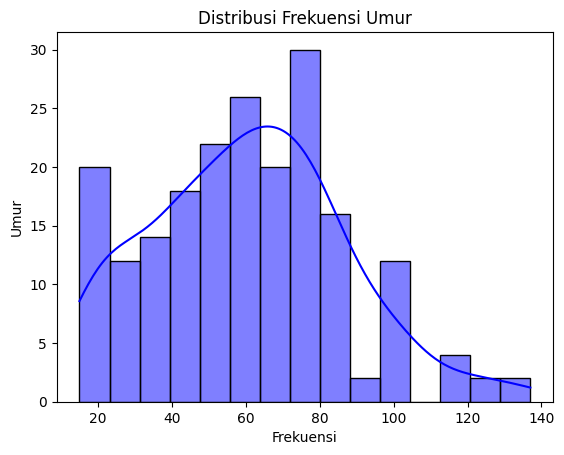

In [ ]:
#2. EDA
sns.histplot(df[''],
             kde=True,
             color='blue',
             bins=15)
plt.title("Distribusi Frekuensi Umur")
plt.xlabel("Frekuensi")
plt.ylabel("Umur")
plt.show()

In [66]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
#3. values_counts
counts_ = df[''].value_counts()
counts_


gender
Female    112
Male       88
Name: count, dtype: int64

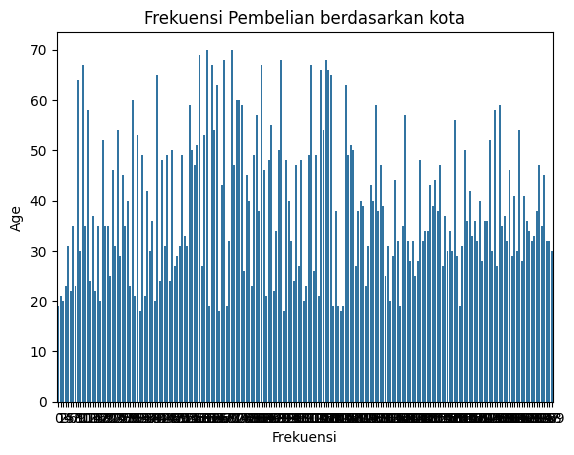

In [98]:
# 4 EDA barplot
sns.barplot(df[''])
plt.title("Frekuensi")
plt.xlabel("Frekuensi")
plt.ylabel("Age")
plt.show()

In [69]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
# 5. Drop kolom , Pilih Fitur
df = df.drop(columns=['',''])

In [72]:
features = ["age",
            "annual_income",
            "spending_score"]

In [73]:
#6. Standar Scaller
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
scale_features = scaler.fit_transform(df[features])

In [75]:
#7. K-means
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [76]:
# HC
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [77]:
# Dbscan
from sklearn.cluster import DBSCAN

In [78]:
# Modelling K-means
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scale_features)
    inertia.append(kmeans.inertia_)

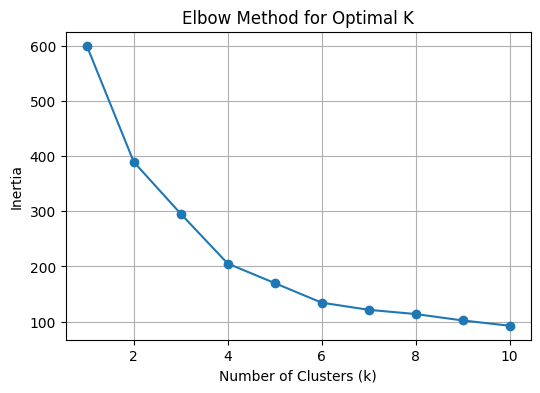

In [80]:
plt.figure(figsize=(6,4))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [84]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Kmeans'] = kmeans.fit_predict(scale_features)

In [85]:
df.head()

,age,annual_income,spending_score,Kmeans
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2


In [88]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scale_features)

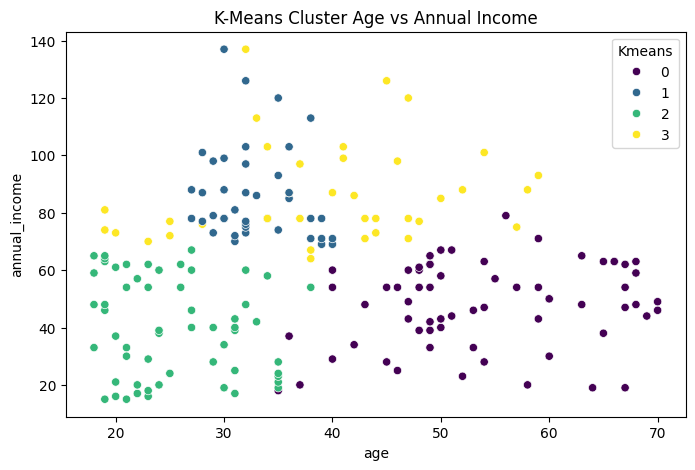

In [91]:
# 9. Scatterplot 
# x = age y = annual
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='annual_income', hue='Kmeans', data=df, palette='viridis')
plt.title("K-Means Cluster Age vs Annual Income")
plt.show()

In [81]:
# Modelling HC
linked =linkage(scale_features, method='ward')

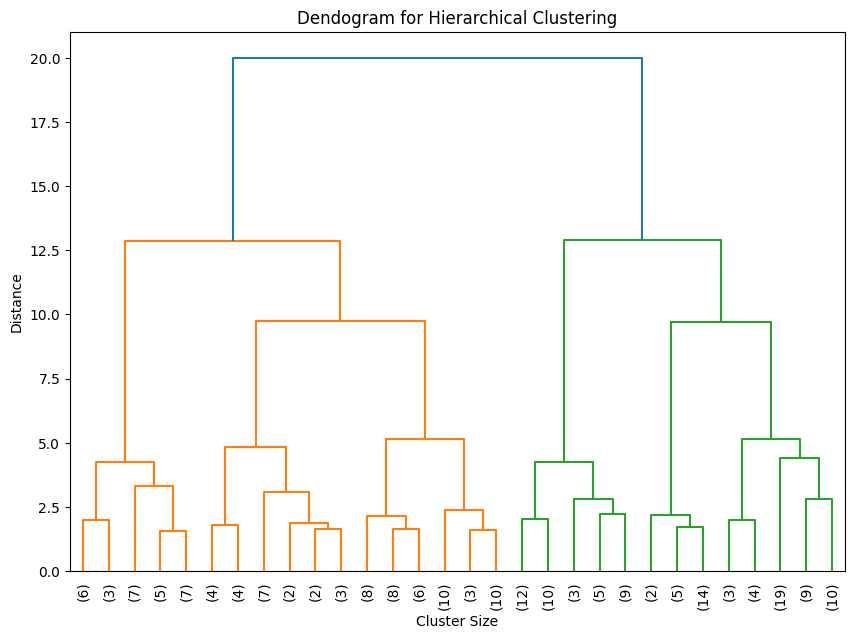

In [82]:
plt.figure(figsize=(10,7))
plt.title("Dendogram for Hierarchical Clustering")
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [86]:
cluster_labels = cut_tree(linked, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [87]:
df['HC'] = cluster_labels
df.head()

,age,annual_income,spending_score,Kmeans,HC
0,19,15,39,2,0
1,21,15,81,2,1
2,20,16,6,2,0
3,23,16,77,2,1
4,31,17,40,2,0


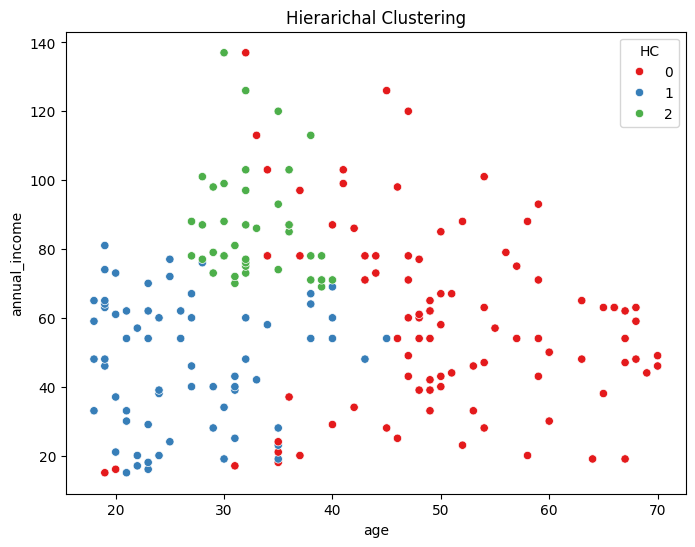

In [92]:
# Scatterplot HC
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='annual_income', hue='HC', data=df, palette='Set1')
plt.title("Hierarichal Clustering")
plt.show()

In [89]:
# Model DBScan
dbscan = DBSCAN(eps=0.5, min_samples=6)
df['dbscan'] = dbscan.fit_predict(scale_features)

In [90]:
df.head()

,age,annual_income,spending_score,Kmeans,HC,dbscan
0,19,15,39,2,0,-1
1,21,15,81,2,1,0
2,20,16,6,2,0,-1
3,23,16,77,2,1,0
4,31,17,40,2,0,-1


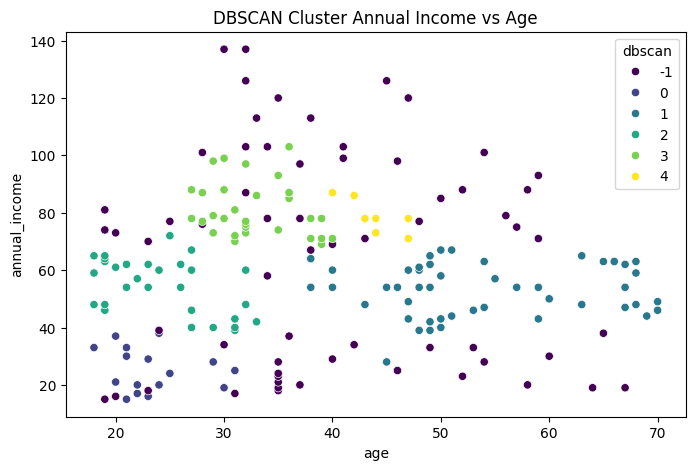

In [93]:
# ScatterPlot Dbscan
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='annual_income', hue='dbscan', data=df, palette='viridis')
plt.title("DBSCAN Cluster Annual Income vs Age")
plt.show()

In [94]:
# 10. Bikin plot 3D
import plotly.express as px
import plotly.graph_objects as go

In [97]:
fig = px.scatter_3d(df, x='age', y='annual_income', z='spending_score', size ='Kmeans',color="Kmeans")
fig.show()